In [1]:
# import
import pandas as pd
import numpy as np
import scipy as sp
import glob
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('archive\stocks\A.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-11-18,32.546494,35.765381,28.612303,31.473534,27.068665,62546300
1,1999-11-19,30.713520,30.758226,28.478184,28.880543,24.838577,15234100
2,1999-11-22,29.551144,31.473534,28.657009,31.473534,27.068665,6577800
3,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.607880,5975600
4,1999-11-24,28.701717,29.998211,28.612303,29.372318,25.261524,4843200
5,1999-11-26,29.238197,29.685265,29.148785,29.461731,25.338428,1729400
6,1999-11-29,29.327610,30.355865,29.014664,30.132332,25.915169,4074700
7,1999-11-30,30.042919,30.713520,29.282904,30.177038,25.953619,4310000
8,1999-12-01,30.177038,31.071173,29.953505,30.713520,26.415012,2957300
9,1999-12-02,31.294706,32.188843,30.892345,31.562946,27.145563,3069800


In [10]:
path = r'archive\stocks' # use your path
all_files = glob.glob(path + "/*.csv")

li = []
i = 0

for filename in all_files:
    if i <10:
        df = pd.read_csv(filename, index_col=None, header=0)
        df['Stock'] = filename[-5:].replace('.csv', '')
        li.append(df)
        i = i + 1

frame = pd.concat(li, axis=0, ignore_index=True)
frame.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,1999-11-18,32.546494,35.765381,28.612303,31.473534,27.068665,62546300,A
1,1999-11-19,30.713520,30.758226,28.478184,28.880543,24.838577,15234100,A
2,1999-11-22,29.551144,31.473534,28.657009,31.473534,27.068665,6577800,A
3,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.607880,5975600,A
4,1999-11-24,28.701717,29.998211,28.612303,29.372318,25.261524,4843200,A
5,1999-11-26,29.238197,29.685265,29.148785,29.461731,25.338428,1729400,A
6,1999-11-29,29.327610,30.355865,29.014664,30.132332,25.915169,4074700,A
7,1999-11-30,30.042919,30.713520,29.282904,30.177038,25.953619,4310000,A
8,1999-12-01,30.177038,31.071173,29.953505,30.713520,26.415012,2957300,A
9,1999-12-02,31.294706,32.188843,30.892345,31.562946,27.145563,3069800,A


<AxesSubplot:xlabel='Date'>

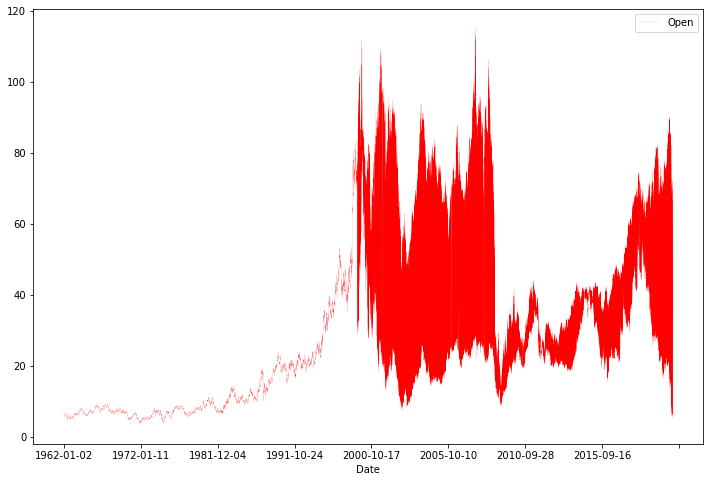

In [11]:
frame[frame['Stock'] == 'A'].sort_values('Date').plot(kind='line',x='Date', y='Close',color='red',figsize=(12,8),linewidth=0.1)

<AxesSubplot:xlabel='Date'>

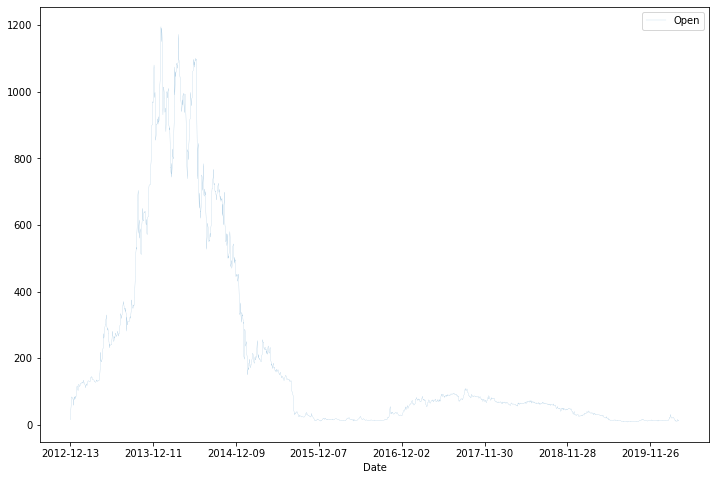

In [60]:
frame[frame['Stock'] == 'C'].sort_values('Date').plot(kind='line',x='Date', y='Open',figsize=(12,8),linewidth=0.1)

In [61]:
frame['Stock'].unique()

array(['A', 'G', 'L', 'C', 'E', 'N', 'I', 'P'], dtype=object)

In [29]:
sorted_stocks = frame.sort_values(by=['Stock', 'Date'])

In [62]:
sorted_stocks['dClose'] = (sorted_stocks['Close'].shift(1) - sorted_stocks['Close'].shift(2))/sorted_stocks['Close'].shift(2)*100
sorted_stocks.head(11)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock,dClose,SMA1,SMA2,ewma
5124,1962-01-02,6.532155,6.556185,6.532155,6.532155,1.536658,55900,A,NaN,NaN,NaN,NaN
5125,1962-01-03,6.532155,6.632280,6.524145,6.632280,1.560212,74500,A,NaN,NaN,NaN,NaN
5126,1962-01-04,6.632280,6.664320,6.632280,6.632280,1.560212,80500,A,1.532799,NaN,NaN,NaN
5127,1962-01-05,6.632280,6.656310,6.616260,6.624270,1.558326,70500,A,0.000000,NaN,NaN,NaN
5128,1962-01-08,6.608250,6.608250,6.339915,6.408000,1.507450,93800,A,-0.120772,NaN,NaN,NaN
5129,1962-01-09,6.408000,6.508125,6.355935,6.355935,1.495202,64500,A,-3.264812,NaN,NaN,NaN
5130,1962-01-10,6.355935,6.408000,6.339915,6.363945,1.497087,34500,A,-0.812498,NaN,NaN,NaN
5131,1962-01-11,6.347925,6.347925,6.323895,6.339915,1.491434,27900,A,0.126023,NaN,NaN,NaN
5132,1962-01-12,6.339915,6.347925,6.207750,6.207750,1.460343,26500,A,-0.377599,NaN,NaN,NaN
5133,1962-01-15,6.139665,6.139665,6.055560,6.055560,1.424540,64500,A,-2.084649,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

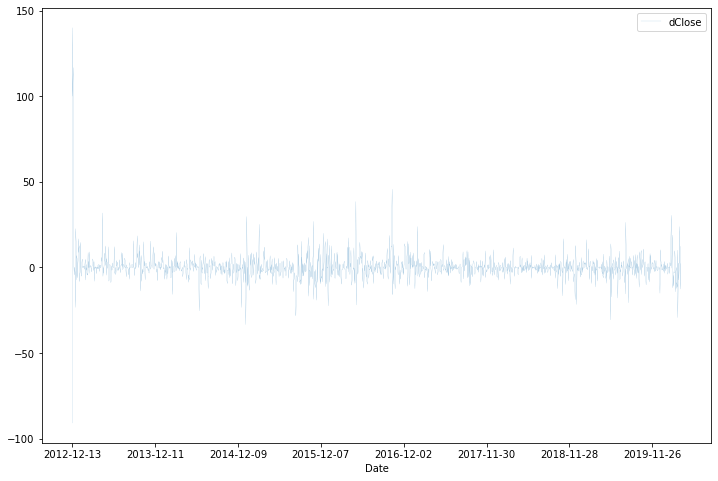

In [63]:
sorted_stocks[sorted_stocks['Stock'] == 'C'].sort_values('Date').plot(kind='line',x='Date', y='dClose',figsize=(12,8),linewidth=0.1)

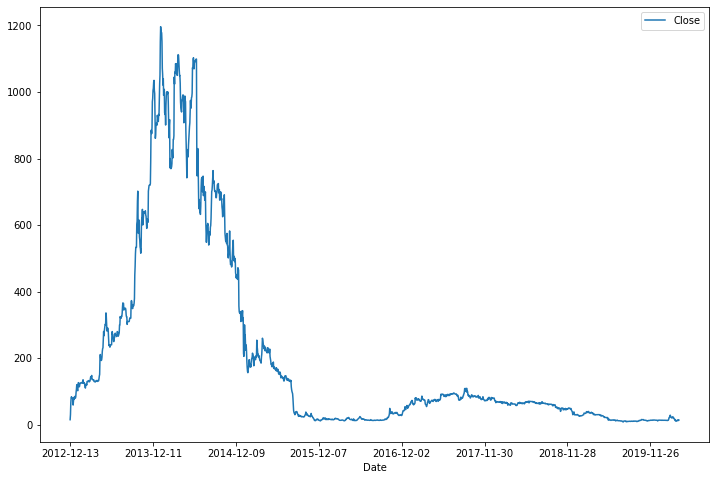

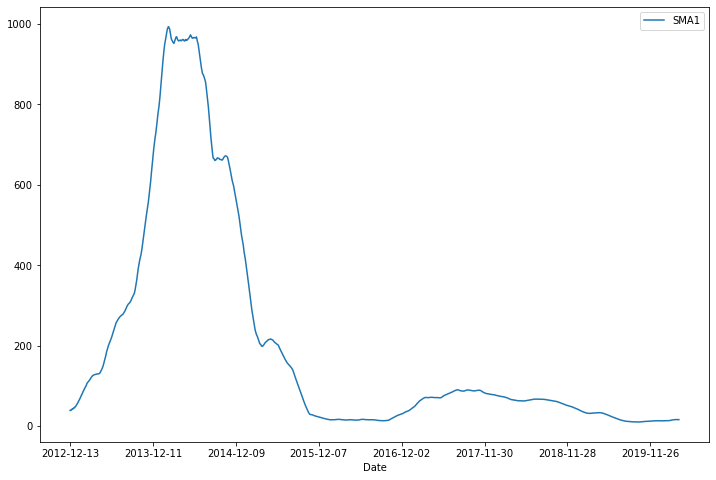

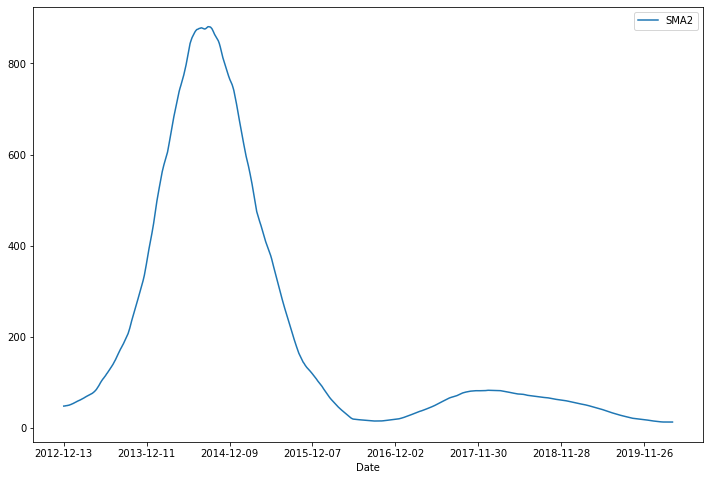

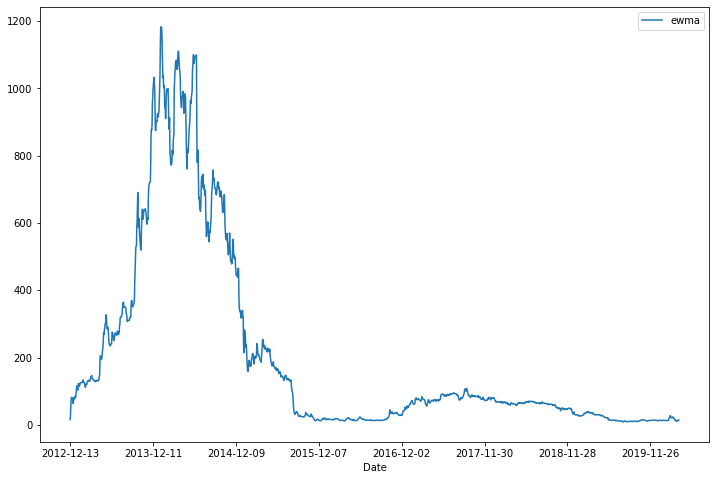

In [116]:
#Creating and Plotting Moving Averages

sorted_stocks['SMA1']  = sorted_stocks['Close'].rolling(window=50).mean()

sorted_stocks['SMA2'] = sorted_stocks['Close'].rolling(window=200).mean()
sorted_stocks['ewma'] = sorted_stocks['Close'].ewm(halflife=0.5, min_periods=20).mean()
sorted_stocks.head(11)



sorted_stocks[sorted_stocks['Stock'] == 'C'].plot(x='Date',y='Close',figsize=(12,8))
sorted_stocks[sorted_stocks['Stock'] == 'C'].plot(x='Date',y='SMA1', label="SMA1",figsize=(12,8))
sorted_stocks[sorted_stocks['Stock'] == 'C'].plot(x='Date',y='SMA2', label="SMA2",figsize=(12,8))
sorted_stocks[sorted_stocks['Stock'] == 'C'].plot(x='Date',y='ewma', label="ewma",figsize=(12,8))
#plt.plot(sorted_stocks['Date'],sorted_stocks['Open'], label="Open")
plt.legend()
plt.show()

# sorted_stocks.plot(kind='line',x='Date', y='SMA1',figsize=(12,8),linewidth=0.5)
# sorted_stocks.plot(kind='line',x='Date', y='SMA2',figsize=(12,8),linewidth=0.5)
# sorted_stocks.plot(kind='line',x='Date', y='ewma',figsize=(12,8),linewidth=0.5)


# plt.legend()
# plt.show()

<Figure size 720x720 with 0 Axes>

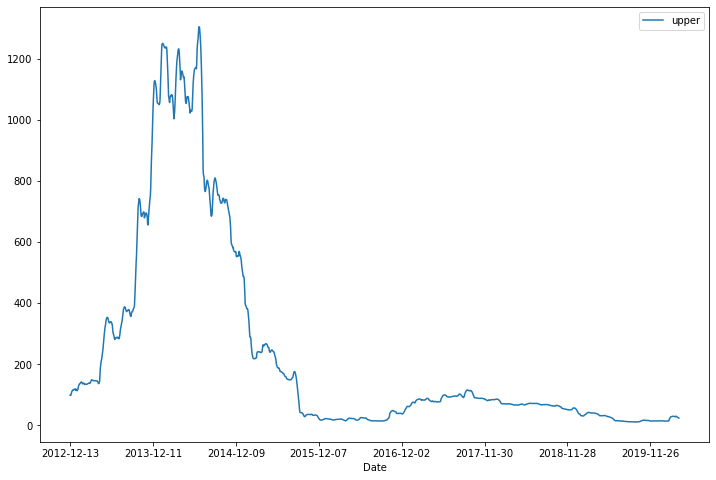

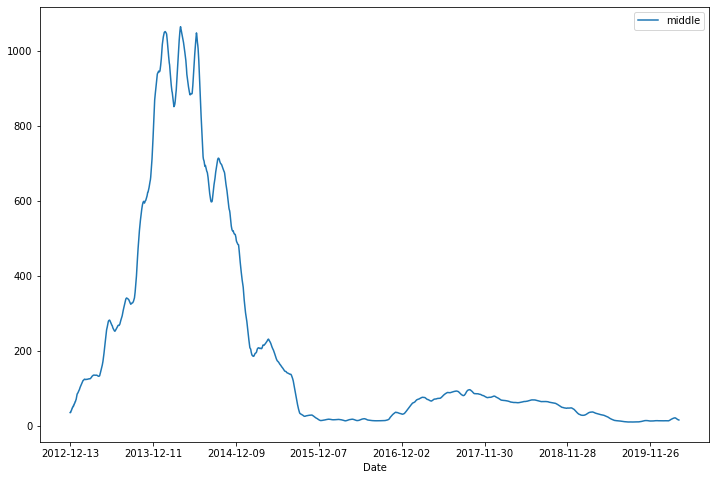

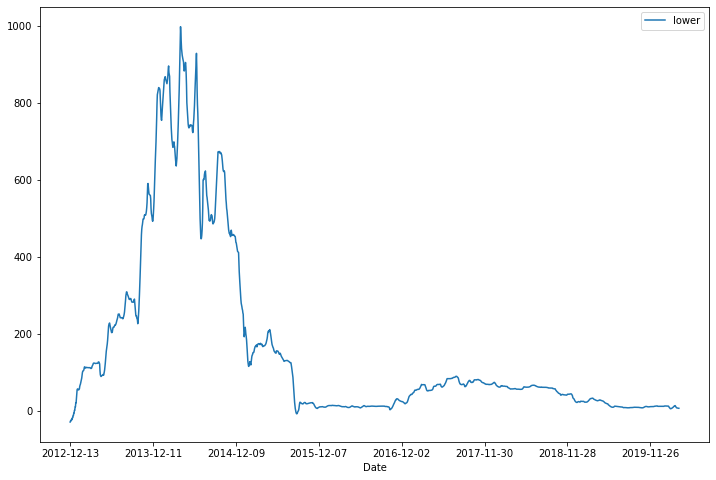

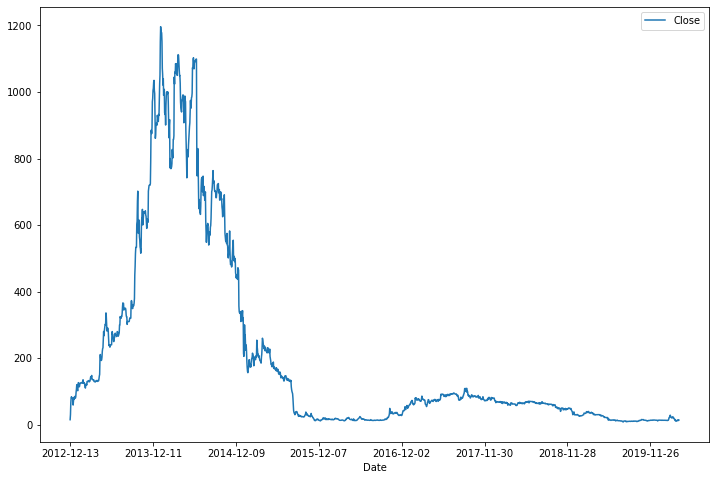

In [115]:
#Creating and Plotting Bollinger Bands
sorted_stocks['middle_band'] = sorted_stocks['Close'].rolling(window=20).mean()
sorted_stocks['upper_band'] = sorted_stocks['Close'].rolling(window=20).mean() + sorted_stocks['Close'].rolling(window=20).std()*2
sorted_stocks['lower_band'] = sorted_stocks['Close'].rolling(window=20).mean() - sorted_stocks['Close'].rolling(window=20).std()*2
sorted_stocks.head(11)

plt.figure(figsize=(10,10))
sorted_stocks[sorted_stocks['Stock'] == 'C'].plot(x='Date', y='upper_band', label="upper",figsize=(12,8))
sorted_stocks[sorted_stocks['Stock'] == 'C'].plot(x='Date', y='middle_band', label="middle",figsize=(12,8))
sorted_stocks[sorted_stocks['Stock'] == 'C'].plot(x='Date', y='lower_band', label="lower",figsize=(12,8))
sorted_stocks[sorted_stocks['Stock'] == 'C'].plot(x='Date', y='Close', label="Close",figsize=(12,8))
plt.legend()
plt.legend(loc='best')
plt.show()

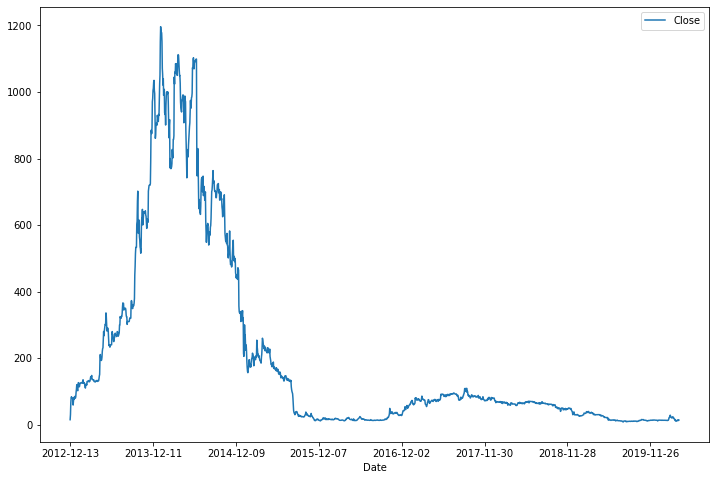

In [119]:
#Creating and Plotting Moving Averages


sorted_stocks['SMA1']  = sorted_stocks['Close'].rolling(window=50).mean()

sorted_stocks['SMA2'] = sorted_stocks['Close'].rolling(window=200).mean()
sorted_stocks['ewma'] = sorted_stocks['Close'].ewm(halflife=0.5, min_periods=20).mean()
sorted_stocks.head(11)

x1=sorted_stocks['Date']
y1=sorted_stocks['Close']



sorted_stocks[sorted_stocks['Stock'] == 'C'].plot(x='Date',y='Close',figsize=(12,8))


# sorted_stocks[sorted_stocks['Stock'] == 'C'].sort_values('Date').plot(x='Date',y='Close',figsize=(12,8))
# sorted_stocks[sorted_stocks['Stock'] == 'C'].sort_values('Date').plot(x='Date',y='SMA1', label="SMA1",figsize=(12,8))
# sorted_stocks[sorted_stocks['Stock'] == 'C'].sort_values('Date').plot(x='Date',y='SMA2', label="SMA2",figsize=(12,8))
# sorted_stocks[sorted_stocks['Stock'] == 'C'].sort_values('Date').plot(x='Date',y='ewma', label="ewma",figsize=(12,8))
#plt.plot(sorted_stocks['Date'],sorted_stocks['Open'], label="Open")
plt.legend()
plt.show()

# sorted_stocks.plot(kind='line',x='Date', y='SMA1',figsize=(12,8),linewidth=0.5)
# sorted_stocks.plot(kind='line',x='Date', y='SMA2',figsize=(12,8),linewidth=0.5)
# sorted_stocks.plot(kind='line',x='Date', y='ewma',figsize=(12,8),linewidth=0.5)


# plt.legend()
# plt.show()

             Date   Open   High    Low  Close  Adj Close      dClose     SMA1  \
23701  2012-12-13  15.00  15.00  15.00  15.00      15.00  -90.931515  39.0188   
23702  2012-12-14  19.00  30.00  19.00  30.00      30.00  140.000000  39.3496   
23703  2012-12-17  31.50  65.00  31.50  65.00      65.00  100.000000  39.1082   
23704  2012-12-18  65.00  89.00  65.00  80.00      80.00  116.666667  40.4308   
23705  2012-12-19  80.00  84.00  78.00  84.00      84.00   23.076923  40.4714   
...           ...    ...    ...    ...    ...        ...         ...      ...   
25533  2020-03-26  16.00  16.00  13.49  13.98      13.98   23.809527  16.1812   
25534  2020-03-27  13.76  14.13  13.76  14.07      14.07    3.402360  16.1990   
25535  2020-03-30  13.27  13.27  11.88  12.29      12.29    0.643778  16.1758   
25536  2020-03-31  12.10  14.78  12.07  13.80      13.80  -12.651029  16.1920   
25537  2020-04-01  14.30  15.05  13.54  13.85      13.85   12.286414  16.2002   

           SMA2       ewma 

<AxesSubplot:xlabel='Date'>

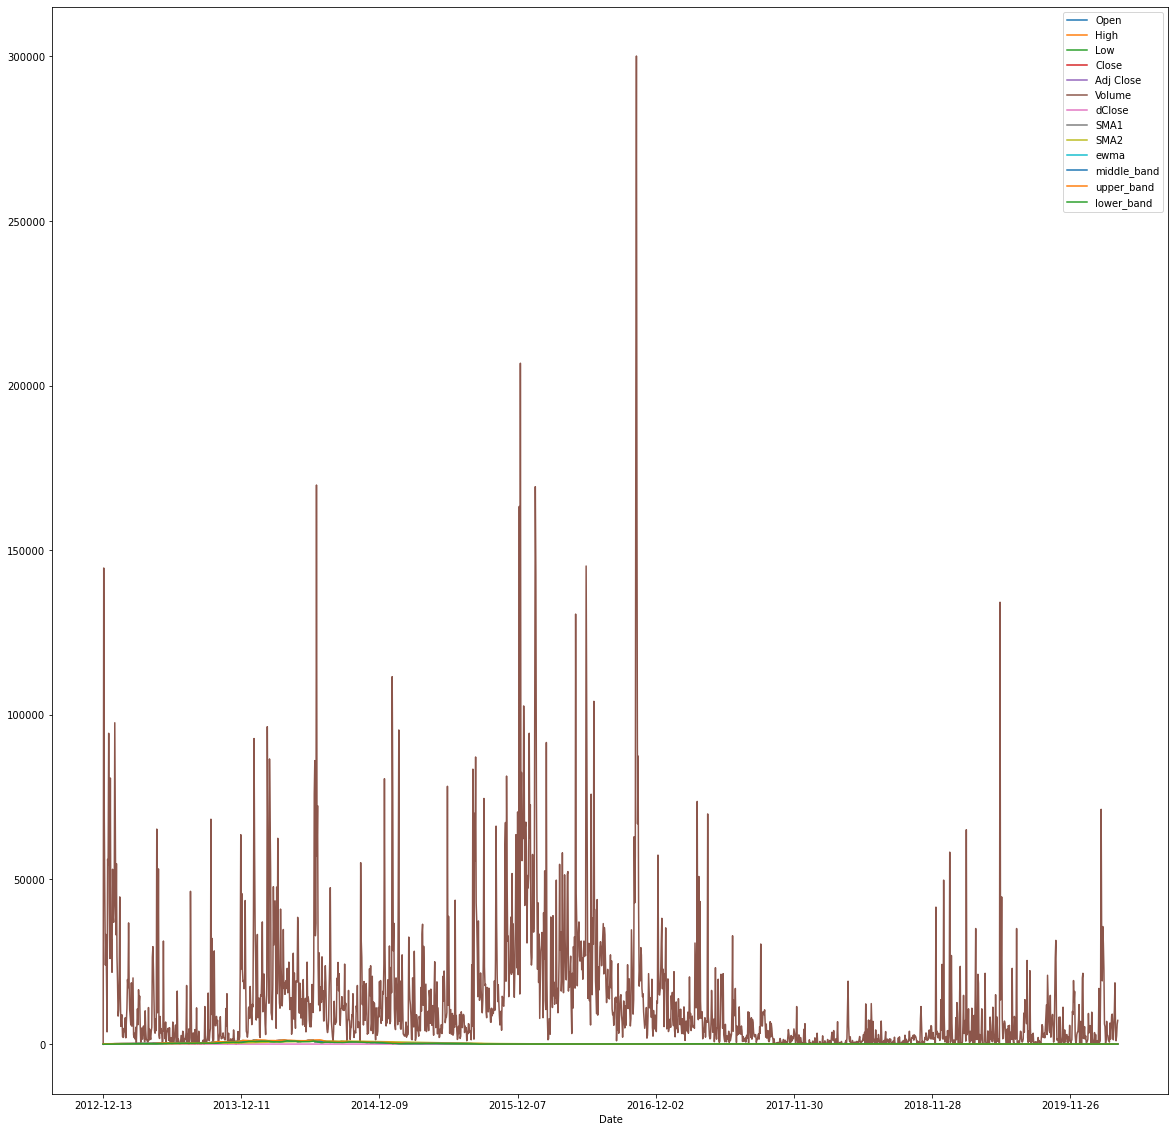

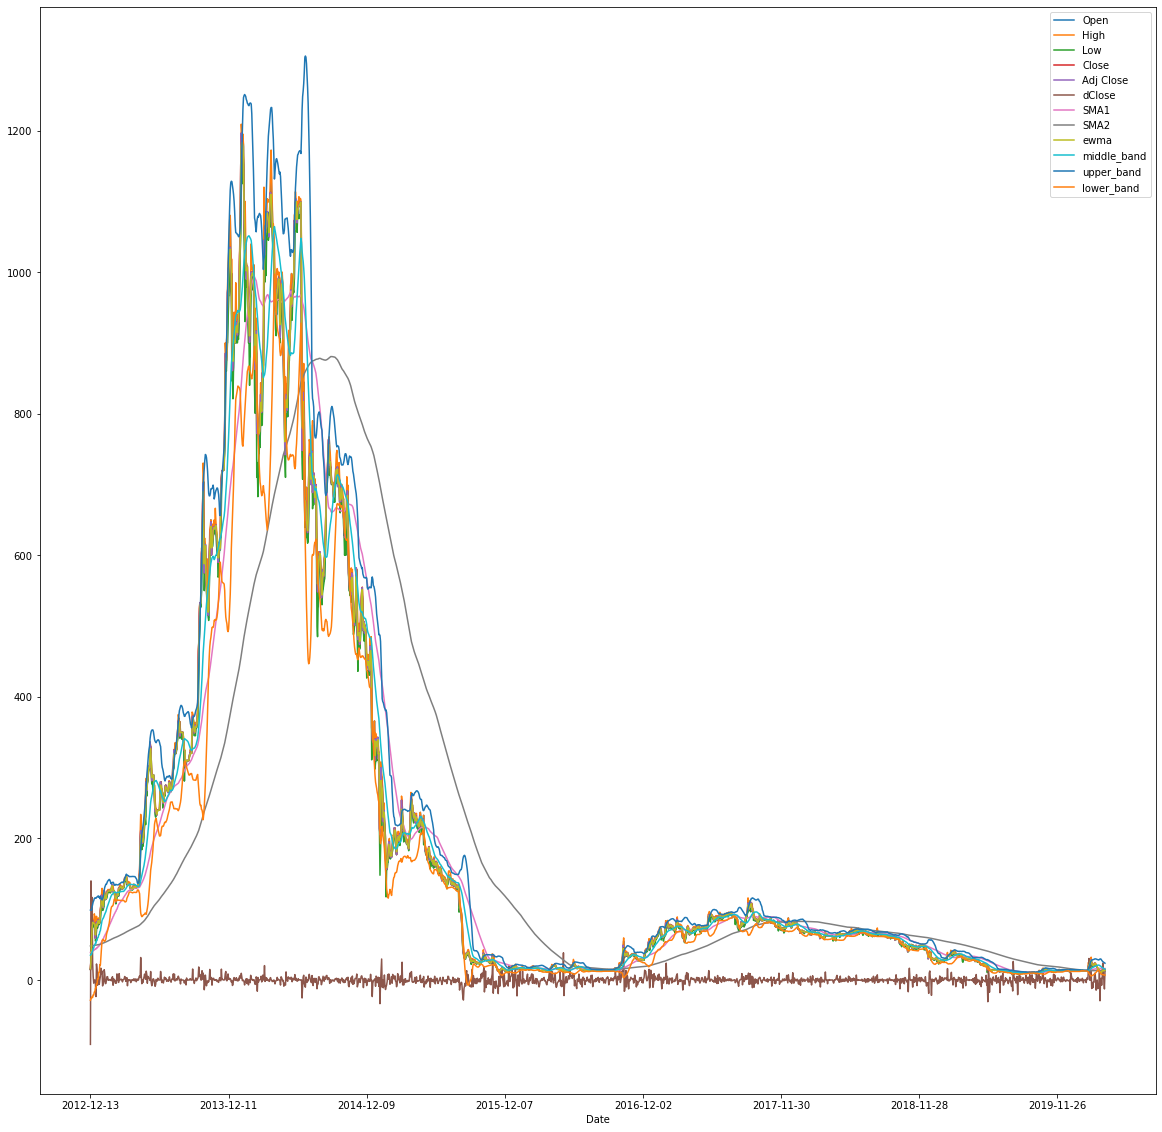

In [136]:

sorted_stocks[sorted_stocks['Stock'] == 'C'].plot(x='Date',figsize=(20,20))


             Date   Open   High    Low  Close  Adj Close      dClose     SMA1  \
23701  2012-12-13  15.00  15.00  15.00  15.00      15.00  -90.931515  39.0188   
23702  2012-12-14  19.00  30.00  19.00  30.00      30.00  140.000000  39.3496   
23703  2012-12-17  31.50  65.00  31.50  65.00      65.00  100.000000  39.1082   
23704  2012-12-18  65.00  89.00  65.00  80.00      80.00  116.666667  40.4308   
23705  2012-12-19  80.00  84.00  78.00  84.00      84.00   23.076923  40.4714   
...           ...    ...    ...    ...    ...        ...         ...      ...   
25533  2020-03-26  16.00  16.00  13.49  13.98      13.98   23.809527  16.1812   
25534  2020-03-27  13.76  14.13  13.76  14.07      14.07    3.402360  16.1990   
25535  2020-03-30  13.27  13.27  11.88  12.29      12.29    0.643778  16.1758   
25536  2020-03-31  12.10  14.78  12.07  13.80      13.80  -12.651029  16.1920   
25537  2020-04-01  14.30  15.05  13.54  13.85      13.85   12.286414  16.2002   

           SMA2       ewma 

<AxesSubplot:xlabel='Date'>

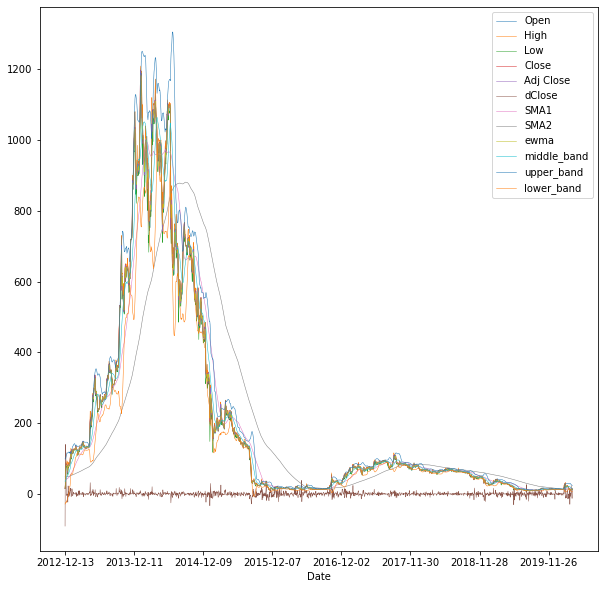

In [146]:
temp_df = sorted_stocks[sorted_stocks['Stock'] == 'C'][['Date', 'Open','High','Low','Close','Adj Close','dClose','SMA1','SMA2','ewma','middle_band','upper_band','lower_band']]
print(temp_df)
temp_df.plot(x='Date',figsize=(10,10),linewidth=0.5)

             Date  Close  middle_band  upper_band  lower_band
23701  2012-12-13  15.00      35.0940   98.840089  -28.652089
23702  2012-12-14  30.00      36.3025   98.612905  -26.007905
23703  2012-12-17  65.00      36.2295   98.394393  -25.935393
23704  2012-12-18  80.00      39.9555  103.282412  -23.371412
23705  2012-12-19  84.00      40.9870  106.552257  -24.578257
...           ...    ...          ...         ...         ...
25533  2020-03-26  13.98      16.8560   26.013785    7.698215
25534  2020-03-27  14.07      16.4920   25.474729    7.509271
25535  2020-03-30  12.29      16.0665   24.996069    7.136931
25536  2020-03-31  13.80      15.7505   24.521994    6.979007
25537  2020-04-01  13.85      15.3680   23.742017    6.993983

[1837 rows x 5 columns]


<AxesSubplot:xlabel='Date'>

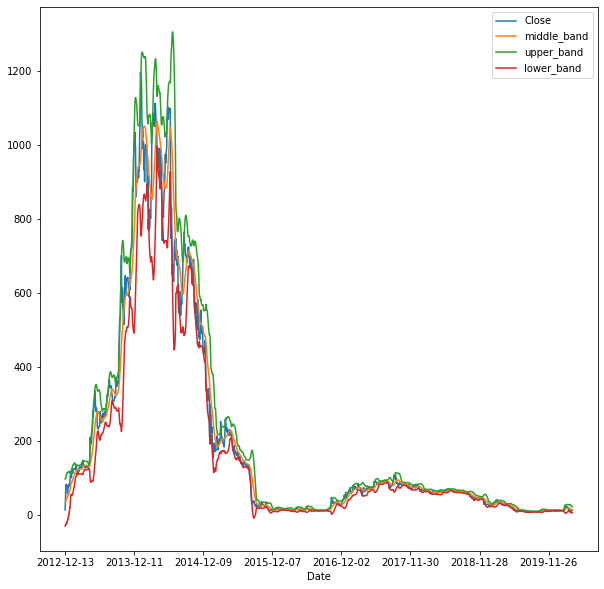

In [143]:


temp_df = sorted_stocks[sorted_stocks['Stock'] == 'C'][['Date','Close','middle_band','upper_band','lower_band']]
print(temp_df)
temp_df.plot(x='Date',figsize=(10,10))

             Date  Close     SMA1      SMA2       ewma
23701  2012-12-13  15.00  39.0188  48.14750  15.953452
23702  2012-12-14  30.00  39.3496  48.18470  26.488363
23703  2012-12-17  65.00  39.1082  48.12650  55.372091
23704  2012-12-18  80.00  40.4308  48.41385  73.843023
23705  2012-12-19  84.00  40.4714  48.44960  81.460756
...           ...    ...      ...       ...        ...
25533  2020-03-26  13.98  16.1812  13.16880  13.700106
25534  2020-03-27  14.07  16.1990  13.16915  13.977526
25535  2020-03-30  12.29  16.1758  13.16060  12.711882
25536  2020-03-31  13.80  16.1920  13.15960  13.527971
25537  2020-04-01  13.85  16.2002  13.16010  13.769493

[1837 rows x 5 columns]


<AxesSubplot:xlabel='Date'>

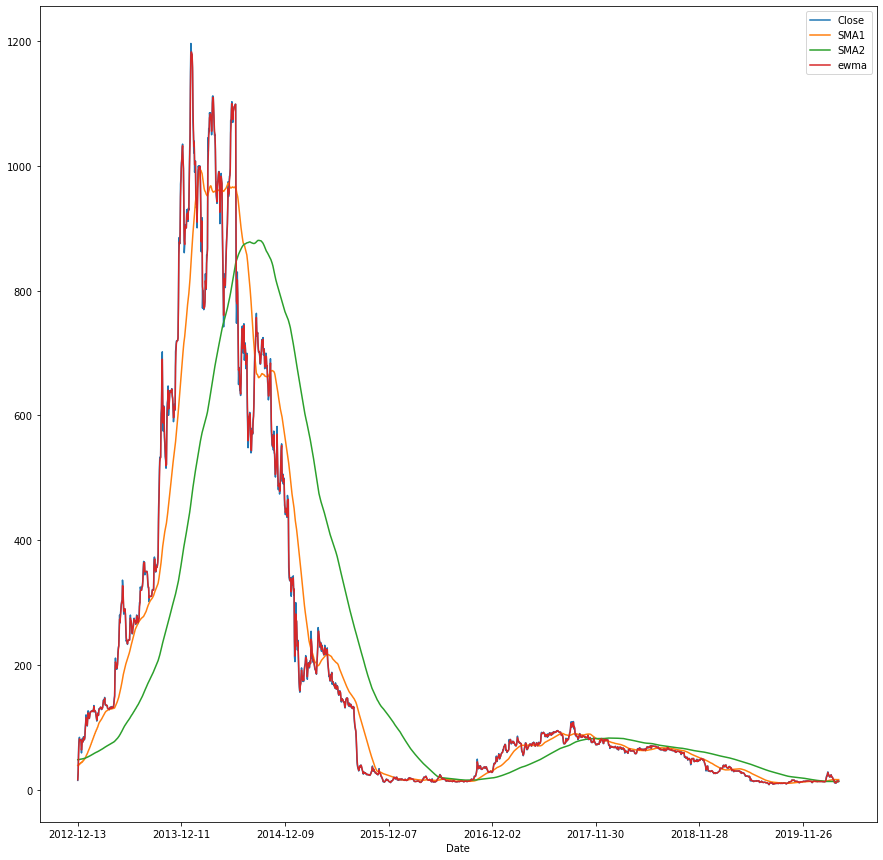

In [140]:
temp_df = sorted_stocks[sorted_stocks['Stock'] == 'C'][['Date', 'Close','SMA1','SMA2','ewma']]
print(temp_df)
temp_df.plot(x='Date',figsize=(15,15))